In [2]:
import os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
# Importando a base
df_base = pd.read_csv('Mens_VolleyballPlusLiga_2028_2023/Mens-Volleyball-PlusLiga-2008-2023.csv')

# Convertendo para Data
df_base['Date'] = pd.to_datetime(df_base['Date'], format='%d.%m.%Y, %H:%M', errors='coerce')
df_base['Ano'] = pd.to_datetime(df_base['Date']).dt.year

# Filtrando a base para ter dados a partir de 2013
df_base = df_base.loc[df_base['Date'].dt.year >= 2020]

df_base.sort_values('Date', ascending=True, inplace=True)
df_base.reset_index(inplace=True, drop=True)
df_base['Match_ID'] = df_base.index
df_base.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Ano,Match_ID
0,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0,3,35.0,6.0,-1.0,50.0,12,0.0,-22%,63.0,7.0,42%,15%,74,9.0,8.0,30.0,40%,17%,5.0,5,49,23,32,73,10,7,1%,38,0,47%,15%,67,2,5,34,50%,40%,8,7,1,2020,0
1,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3,2,72.0,28.0,31.0,107.0,26,8.0,-14%,76.0,5.0,47%,19%,103,3.0,7.0,55.0,53%,43%,9.0,10,68,27,17,101,25,5,-16%,81,8,59%,32%,110,9,9,56,50%,34%,7,17,0,2020,1
2,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1,3,70.0,20.0,30.0,100.0,21,4.0,-14%,80.0,4.0,36%,20%,115,8.0,7.0,59.0,51%,38%,7.0,9,71,20,33,100,20,4,-11%,79,4,48%,30%,113,7,7,60,53%,40%,7,11,1,2020,2
3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,GKS Katowice,0,3,47.0,12.0,19.0,67.0,9,3.0,-7%,66.0,5.0,56%,18%,85,4.0,10.0,38.0,44%,28%,6.0,5,62,24,37,75,9,5,-4%,58,3,48%,22%,90,7,6,47,52%,37%,10,12,1,2020,3
4,2020-09-13 17:30:00,MKS Będzin,Projekt Warszawa,1,3,62.0,17.0,17.0,84.0,16,5.0,-11%,86.0,8.0,50%,23%,118,12.0,9.0,52.0,44%,26%,5.0,11,66,26,36,95,9,8,1%,68,5,61%,38%,98,11,5,49,50%,33%,9,14,1,2020,4


In [6]:
print(f'Numero de partidas jogadas: {len(df_base)}')

Numero de partidas jogadas: 628


In [7]:
# Tirando os % das colunas de percentual
perc_cols = [
    'T1_Srv_Eff', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Kill_Perc', 
    'T1_Att_Eff', 'T1_Att_Sum', 'T2_Srv_Eff', 'T2_Rec_Pos', 'T2_Rec_Perf', 
    'T2_Att_Kill_Perc', 'T2_Att_Eff', 'T2_Att_Sum'
]
for col in perc_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace('%', ''))

In [8]:
# Ajustando virgulas por pontos nas colunas de float
float_cols = ['T1_Srv_Err', 'T1_Blk_As', 'T2_Srv_Err', 'T2_Blk_As']
for col in float_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace(',', '.'))

In [9]:
time1_df = pd.concat([df_base[['Match_ID', 'Date', 'Team_1', 'T1_Score', 'Ano']], 
                      df_base.loc[:, 'T1_Sum': 'T1_Blk_As']], axis=1)

time2_df = pd.concat([df_base[['Match_ID', 'Date', 'Team_2', 'T2_Score', 'Ano']], 
                      df_base.loc[:, 'T2_Sum': 'T2_Blk_As']], axis=1)

time1_df['Oponente'] = df_base['Team_2']

time2_df['Oponente'] = df_base['Team_1']

In [10]:
time1_df.columns

Index(['Match_ID', 'Date', 'Team_1', 'T1_Score', 'Ano', 'T1_Sum', 'T1_BP',
       'T1_Ratio', 'T1_Srv_Sum', 'T1_Srv_Err', 'T1_Srv_Ace', 'T1_Srv_Eff',
       'T1_Rec_Sum', 'T1_Rec_Err', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Sum',
       'T1_Att_Err', 'T1_Att_Blk', 'T1_Att_Kill', 'T1_Att_Kill_Perc',
       'T1_Att_Eff', 'T1_Blk_Sum', 'T1_Blk_As', 'Oponente'],
      dtype='object')

In [11]:
time2_df.columns

Index(['Match_ID', 'Date', 'Team_2', 'T2_Score', 'Ano', 'T2_Sum', 'T2_BP',
       'T2_Ratio', 'T2_Srv_Sum', 'T2_Srv_Err', 'T2_Srv_Ace', 'T2_Srv_Eff',
       'T2_Rec_Sum', 'T2_Rec_Err', 'T2_Rec_Pos', 'T2_Rec_Perf', 'T2_Att_Sum',
       'T2_Att_Err', 'T2_Att_Blk', 'T2_Att_Kill', 'T2_Att_Kill_Perc',
       'T2_Att_Eff', 'T2_Blk_Sum', 'T2_Blk_As', 'Oponente'],
      dtype='object')

In [12]:
# Combinando os datasets para que cada linha seja para a performance de um time
concatenacao_colunas = {x: y for x, y in zip(time2_df.columns, time1_df.columns)}
time_perf_df = pd.concat(
    [
        time1_df, 
        time2_df.rename(columns=concatenacao_colunas)
    ])
time_perf_df.columns = time_perf_df.columns.str.replace('T1_', '')
time_perf_df.head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0,2020,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,GKS Katowice
4,4,2020-09-13 17:30:00,MKS Będzin,1,2020,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,Projekt Warszawa


In [13]:
df = time_perf_df.merge(
        time_perf_df, 
        how='inner', 
        left_on=['Match_ID', 'Oponente'], 
        right_on=['Match_ID', 'Team_1'],
        suffixes=('', '_T2')
)

df.drop(['Date_T2', 'Team_1_T2', 'Ano_T2', 'Oponente_T2'], axis=1, inplace=True)
df.head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente,Score_T2,Sum_T2,BP_T2,Ratio_T2,Srv_Sum_T2,Srv_Err_T2,Srv_Ace_T2,Srv_Eff_T2,Rec_Sum_T2,Rec_Err_T2,Rec_Pos_T2,Rec_Perf_T2,Att_Sum_T2,Att_Err_T2,Att_Blk_T2,Att_Kill_T2,Att_Kill_Perc_T2,Att_Eff_T2,Blk_Sum_T2,Blk_As_T2
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle,3,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn,2,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów,3,71.0,20.0,33.0,100.0,20,4.0,-11,79.0,4.0,48,30,113,7.0,7.0,60.0,53,40,7.0,11
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0,2020,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,GKS Katowice,3,62.0,24.0,37.0,75.0,9,5.0,-4,58.0,3.0,48,22,90,7.0,6.0,47.0,52,37,10.0,12
4,4,2020-09-13 17:30:00,MKS Będzin,1,2020,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,Projekt Warszawa,3,66.0,26.0,36.0,95.0,9,8.0,1,68.0,5.0,61,38,98,11.0,5.0,49.0,50,33,9.0,14


In [14]:
print(f'Numero de partidas jogadas: {len(df)}')

Numero de partidas jogadas: 1256


In [15]:
df['Vencedor'] = np.where(df['Score'] < 3, 0, 1)
df['SetsTotais'] = df['Score'] + df['Score_T2']
df['DiffSets'] = df['Score'] - df['Score_T2']
df.sort_values('Match_ID').head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente,Score_T2,Sum_T2,BP_T2,Ratio_T2,Srv_Sum_T2,Srv_Err_T2,Srv_Ace_T2,Srv_Eff_T2,Rec_Sum_T2,Rec_Err_T2,Rec_Pos_T2,Rec_Perf_T2,Att_Sum_T2,Att_Err_T2,Att_Blk_T2,Att_Kill_T2,Att_Kill_Perc_T2,Att_Eff_T2,Blk_Sum_T2,Blk_As_T2,Vencedor,SetsTotais,DiffSets
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle,3,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7,0,3,-3
628,0,2020-09-11 17:30:00,ZAKSA Kędzierzyn-Koźle,3,2020,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7,Stal Nysa,0,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,1,3,3
629,1,2020-09-12 14:45:00,AZS Olsztyn,2,2020,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17,Czarni Radom,3,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,0,5,-1
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn,2,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17,1,5,1
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów,3,71.0,20.0,33.0,100.0,20,4.0,-11,79.0,4.0,48,30,113,7.0,7.0,60.0,53,40,7.0,11,0,4,-2


In [16]:
df_agrupado_ano = df.Ano.value_counts().sort_index()
df_agrupado_ano

2020    220
2021    376
2022    534
2023    126
Name: Ano, dtype: int64

In [17]:
mapeamento_colunas = {
    'Team_1': 'Time',
    'Score': 'Set_T1',
    'Sum': 'PontuacaoFinal_T1', 
    'BP': 'PontosCADoSaque_T1', 
    'Ratio': 'Ratio_T1',
    'Srv_Sum': 'TotalSaques_T1', 
    'Srv_Err': 'TotalSaquesErrados_T1', 
    'Srv_Ace': 'TotalAces_T1',
    'Srv_Eff': 'PercEficSaque_T1',  
    'Rec_Sum': 'TotalSaquesRecebidos_T1', 
    'Rec_Err': 'TotalSaquesRecebidosErrados_T1', 
    'Rec_Pos': 'PercSaquesRecebidos_T1',
    'Rec_Perf': 'PercDeSaquesRecebidosPerfeitos_T1',
    'Att_Sum': 'TotalAtaques_T1', 
    'Att_Err': 'TotalAtaquesErrados_T1', 
    'Att_Blk': 'TotalBloqueiosSofridos_T1',  
    'Att_Kill': 'PontosAtaque_T1', # (PontosDeAtaque / TotalAtaques) 
    'Att_Kill_Perc':'PercPontosAtaque_T1',
    'Att_Eff': 'PercEficAtaque_T1', # (PontosDeAtaque - TotalAtaquesBloqueados  / TotalAtaques)?
    'Blk_Sum': 'PontosDeBloqueios_T1', 
    'Blk_As': 'TotalCAPorBloqueio_T1', 
  
    'Score_T2': 'Set_T2',
    'Sum_T2': 'PontuacaoFinal_T2', 
    'BP_T2': 'PontosCADoSaque_T2', 
    'Ratio_T2': 'Ratio_T2',
    'Srv_Sum_T2': 'TotalSaques_T2',
    'Srv_Err_T2': 'TotalSaquesErrados_T2',
    'Srv_Ace_T2': 'TotalAces_T2',
    'Srv_Eff_T2': 'PercEficSaque_T2',
    'Rec_Sum_T2': 'TotalSaquesRecebidos_T2', 
    'Rec_Err_T2': 'TotalSaquesRecebidosErrados_T2', 
    'Rec_Pos_T2': 'PercSaquesRecebidos_T2',
    'Rec_Perf_T2': 'PercDeSaquesRecebidosPerfeitos_T2',
    'Att_Sum_T2': 'TotalAtaques_T2', 
    'Att_Err_T2': 'TotalAtaquesErrados_T2', 
    'Att_Blk_T2': 'TotalBloqueiosSofridos_T2', # Eu ataquei e o time me bloqueiou (TotalAtaquesBloqueados)
    'Att_Kill_T2': 'PontosAtaque_T2', 
    'Att_Kill_Perc_T2': 'PercPontosAtaque_T2', 
    'Att_Eff_T2': 'PercEficAtaque_T2', 
    'Blk_Sum_T2': 'PontosDeBloqueios_T2', 
    'Blk_As_T2': 'TotalCAPorBloqueio_T2'
}
df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,Match_ID,Date,Time,Set_T1,Ano,PontuacaoFinal_T1,PontosCADoSaque_T1,Ratio_T1,TotalSaques_T1,TotalSaquesErrados_T1,TotalAces_T1,PercEficSaque_T1,TotalSaquesRecebidos_T1,TotalSaquesRecebidosErrados_T1,PercSaquesRecebidos_T1,PercDeSaquesRecebidosPerfeitos_T1,TotalAtaques_T1,TotalAtaquesErrados_T1,TotalBloqueiosSofridos_T1,PontosAtaque_T1,PercPontosAtaque_T1,PercEficAtaque_T1,PontosDeBloqueios_T1,TotalCAPorBloqueio_T1,Oponente,Set_T2,PontuacaoFinal_T2,PontosCADoSaque_T2,Ratio_T2,TotalSaques_T2,TotalSaquesErrados_T2,TotalAces_T2,PercEficSaque_T2,TotalSaquesRecebidos_T2,TotalSaquesRecebidosErrados_T2,PercSaquesRecebidos_T2,PercDeSaquesRecebidosPerfeitos_T2,TotalAtaques_T2,TotalAtaquesErrados_T2,TotalBloqueiosSofridos_T2,PontosAtaque_T2,PercPontosAtaque_T2,PercEficAtaque_T2,PontosDeBloqueios_T2,TotalCAPorBloqueio_T2,Vencedor,SetsTotais,DiffSets
0,0,2020-09-11 17:30:00,Stal Nysa,0,2020,35.0,6.0,-1.0,50.0,12,0.0,-22,63.0,7.0,42,15,74,9.0,8.0,30.0,40,17,5.0,5,ZAKSA Kędzierzyn-Koźle,3,49.0,23.0,32.0,73.0,10,7.0,1,38.0,0.0,47,15,67,2.0,5.0,34.0,50,40,8.0,7,0,3,-3
1,1,2020-09-12 14:45:00,Czarni Radom,3,2020,72.0,28.0,31.0,107.0,26,8.0,-14,76.0,5.0,47,19,103,3.0,7.0,55.0,53,43,9.0,10,AZS Olsztyn,2,68.0,27.0,17.0,101.0,25,5.0,-16,81.0,8.0,59,32,110,9.0,9.0,56.0,50,34,7.0,17,1,5,1
2,2,2020-09-12 17:30:00,Cuprum Lubin,1,2020,70.0,20.0,30.0,100.0,21,4.0,-14,80.0,4.0,36,20,115,8.0,7.0,59.0,51,38,7.0,9,PGE Skra Bełchatów,3,71.0,20.0,33.0,100.0,20,4.0,-11,79.0,4.0,48,30,113,7.0,7.0,60.0,53,40,7.0,11,0,4,-2
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0,2020,47.0,12.0,19.0,67.0,9,3.0,-7,66.0,5.0,56,18,85,4.0,10.0,38.0,44,28,6.0,5,GKS Katowice,3,62.0,24.0,37.0,75.0,9,5.0,-4,58.0,3.0,48,22,90,7.0,6.0,47.0,52,37,10.0,12,0,3,-3
4,4,2020-09-13 17:30:00,MKS Będzin,1,2020,62.0,17.0,17.0,84.0,16,5.0,-11,86.0,8.0,50,23,118,12.0,9.0,52.0,44,26,5.0,11,Projekt Warszawa,3,66.0,26.0,36.0,95.0,9,8.0,1,68.0,5.0,61,38,98,11.0,5.0,49.0,50,33,9.0,14,0,4,-2


In [18]:
# Criando as colunas de média e dividindo elas pela coluna de set total para que tenhamos algo mais justo
colunas_selecionadas = df.filter(regex=("^(?!.*Perc)(.*T1|.*T2)")).columns
df[colunas_selecionadas] = df[colunas_selecionadas].astype(float)
set_total = df['SetsTotais']

medias = df[colunas_selecionadas].div(set_total, axis=0)
medias.columns = 'Media' + medias.columns

df = df.join(medias)
df.head()

,Match_ID,Date,Time,Set_T1,Ano,PontuacaoFinal_T1,PontosCADoSaque_T1,Ratio_T1,TotalSaques_T1,TotalSaquesErrados_T1,TotalAces_T1,PercEficSaque_T1,TotalSaquesRecebidos_T1,TotalSaquesRecebidosErrados_T1,PercSaquesRecebidos_T1,PercDeSaquesRecebidosPerfeitos_T1,TotalAtaques_T1,TotalAtaquesErrados_T1,TotalBloqueiosSofridos_T1,PontosAtaque_T1,PercPontosAtaque_T1,PercEficAtaque_T1,PontosDeBloqueios_T1,TotalCAPorBloqueio_T1,Oponente,Set_T2,PontuacaoFinal_T2,PontosCADoSaque_T2,Ratio_T2,TotalSaques_T2,TotalSaquesErrados_T2,TotalAces_T2,PercEficSaque_T2,TotalSaquesRecebidos_T2,TotalSaquesRecebidosErrados_T2,PercSaquesRecebidos_T2,PercDeSaquesRecebidosPerfeitos_T2,TotalAtaques_T2,TotalAtaquesErrados_T2,TotalBloqueiosSofridos_T2,PontosAtaque_T2,PercPontosAtaque_T2,PercEficAtaque_T2,PontosDeBloqueios_T2,TotalCAPorBloqueio_T2,Vencedor,SetsTotais,DiffSets,MediaSet_T1,MediaPontuacaoFinal_T1,MediaPontosCADoSaque_T1,MediaRatio_T1,MediaTotalSaques_T1,MediaTotalSaquesErrados_T1,MediaTotalAces_T1,MediaTotalSaquesRecebidos_T1,MediaTotalSaquesRecebidosErrados_T1,MediaTotalAtaques_T1,MediaTotalAtaquesErrados_T1,MediaTotalBloqueiosSofridos_T1,MediaPontosAtaque_T1,MediaPontosDeBloqueios_T1,MediaTotalCAPorBloqueio_T1,MediaSet_T2,MediaPontuacaoFinal_T2,MediaPontosCADoSaque_T2,MediaRatio_T2,MediaTotalSaques_T2,MediaTotalSaquesErrados_T2,MediaTotalAces_T2,MediaTotalSaquesRecebidos_T2,MediaTotalSaquesRecebidosErrados_T2,MediaTotalAtaques_T2,MediaTotalAtaquesErrados_T2,MediaTotalBloqueiosSofridos_T2,MediaPontosAtaque_T2,MediaPontosDeBloqueios_T2,MediaTotalCAPorBloqueio_T2
0,0,2020-09-11 17:30:00,Stal Nysa,0.0,2020,35.0,6.0,-1.0,50.0,12.0,0.0,-22,63.0,7.0,42,15,74.0,9.0,8.0,30.0,40,17,5.0,5.0,ZAKSA Kędzierzyn-Koźle,3.0,49.0,23.0,32.0,73.0,10.0,7.0,1,38.0,0.0,47,15,67.0,2.0,5.0,34.0,50,40,8.0,7.0,0,3,-3,0.00,11.666667,2.00,-0.333333,16.666667,4.00,0.00,21.0,2.333333,24.666667,3.000000,2.666667,10.000000,1.666667,1.666667,1.00,16.333333,7.666667,10.666667,24.333333,3.333333,2.333333,12.666667,0.00,22.333333,0.666667,1.666667,11.333333,2.666667,2.333333
1,1,2020-09-12 14:45:00,Czarni Radom,3.0,2020,72.0,28.0,31.0,107.0,26.0,8.0,-14,76.0,5.0,47,19,103.0,3.0,7.0,55.0,53,43,9.0,10.0,AZS Olsztyn,2.0,68.0,27.0,17.0,101.0,25.0,5.0,-16,81.0,8.0,59,32,110.0,9.0,9.0,56.0,50,34,7.0,17.0,1,5,1,0.60,14.400000,5.60,6.200000,21.400000,5.20,1.60,15.2,1.000000,20.600000,0.600000,1.400000,11.000000,1.800000,2.000000,0.40,13.600000,5.400000,3.400000,20.200000,5.000000,1.000000,16.200000,1.60,22.000000,1.800000,1.800000,11.200000,1.400000,3.400000
2,2,2020-09-12 17:30:00,Cuprum Lubin,1.0,2020,70.0,20.0,30.0,100.0,21.0,4.0,-14,80.0,4.0,36,20,115.0,8.0,7.0,59.0,51,38,7.0,9.0,PGE Skra Bełchatów,3.0,71.0,20.0,33.0,100.0,20.0,4.0,-11,79.0,4.0,48,30,113.0,7.0,7.0,60.0,53,40,7.0,11.0,0,4,-2,0.25,17.500000,5.00,7.500000,25.000000,5.25,1.00,20.0,1.000000,28.750000,2.000000,1.750000,14.750000,1.750000,2.250000,0.75,17.750000,5.000000,8.250000,25.000000,5.000000,1.000000,19.750000,1.00,28.250000,1.750000,1.750000,15.000000,1.750000,2.750000
3,3,2020-09-12 20:30:00,Ślepsk Malow Suwałki,0.0,2020,47.0,12.0,19.0,67.0,9.0,3.0,-7,66.0,5.0,56,18,85.0,4.0,10.0,38.0,44,28,6.0,5.0,GKS Katowice,3.0,62.0,24.0,37.0,75.0,9.0,5.0,-4,58.0,3.0,48,22,90.0,7.0,6.0,47.0,52,37,10.0,12.0,0,3,-3,0.00,15.666667,4.00,6.333333,22.333333,3.00,1.00,22.0,1.666667,28.333333,1.333333,3.333333,12.666667,2.000000,1.666667,1.00,20.666667,8.000000,12.333333,25.000000,3.000000,1.666667,19.333333,1.00,30.000000,2.333333,2.000000,15.666667,3.333333,4.000000
4,4,2020-09-13 17:30:00,MKS Będzin,1.0,2020,62.0,17.0,17.0,84.0,16.0,5.0,-11,86.0,8.0,50,23,118.0,12.0,9.0,52.0,44,26,5.0,11.0,Projekt Warszawa,3.0,66.0,26.0,36.0,95.0,9.0,8.0,1,68.0,5.0,61,38,98.0,11.0,5.0,49.0,50,33,9.0,14.0,0,4,-2,0.25,15.500000,4.25,4.250000,21.000000,4.00,1.25,21.5,2.000000,29.500000,3.000000,2.250000,13.000000,1.250000,2.750000,0.75,16.500000,6.500000,9.000000,23.750000,2.250000,2.000000,17.000000,1.25,24.500000,2.750000,1.250000,12.250000,2.250000,3.50000

In [19]:
primeiras_colunas = ['Match_ID', 'Ano', 'Date', 'Time', 'Oponente', 'Set_T1', 'Set_T2', 'SetsTotais', 'DiffSets', 'Vencedor']
df = df.sort_values(by=primeiras_colunas)
df = df.loc[:, primeiras_colunas + list(df.columns.difference(primeiras_colunas))]
df.head()

,Match_ID,Ano,Date,Time,Oponente,Set_T1,Set_T2,SetsTotais,DiffSets,Vencedor,MediaPontosAtaque_T1,MediaPontosAtaque_T2,MediaPontosCADoSaque_T1,MediaPontosCADoSaque_T2,MediaPontosDeBloqueios_T1,MediaPontosDeBloqueios_T2,MediaPontuacaoFinal_T1,MediaPontuacaoFinal_T2,MediaRatio_T1,MediaRatio_T2,MediaSet_T1,MediaSet_T2,MediaTotalAces_T1,MediaTotalAces_T2,MediaTotalAtaquesErrados_T1,MediaTotalAtaquesErrados_T2,MediaTotalAtaques_T1,MediaTotalAtaques_T2,MediaTotalBloqueiosSofridos_T1,MediaTotalBloqueiosSofridos_T2,MediaTotalCAPorBloqueio_T1,MediaTotalCAPorBloqueio_T2,MediaTotalSaquesErrados_T1,MediaTotalSaquesErrados_T2,MediaTotalSaquesRecebidosErrados_T1,MediaTotalSaquesRecebidosErrados_T2,MediaTotalSaquesRecebidos_T1,MediaTotalSaquesRecebidos_T2,MediaTotalSaques_T1,MediaTotalSaques_T2,PercDeSaquesRecebidosPerfeitos_T1,PercDeSaquesRecebidosPerfeitos_T2,PercEficAtaque_T1,PercEficAtaque_T2,PercEficSaque_T1,PercEficSaque_T2,PercPontosAtaque_T1,PercPontosAtaque_T2,PercSaquesRecebidos_T1,PercSaquesRecebidos_T2,PontosAtaque_T1,PontosAtaque_T2,PontosCADoSaque_T1,PontosCADoSaque_T2,PontosDeBloqueios_T1,PontosDeBloqueios_T2,PontuacaoFinal_T1,PontuacaoFinal_T2,Ratio_T1,Ratio_T2,TotalAces_T1,TotalAces_T2,TotalAtaquesErrados_T1,TotalAtaquesErrados_T2,TotalAtaques_T1,TotalAtaques_T2,TotalBloqueiosSofridos_T1,TotalBloqueiosSofridos_T2,TotalCAPorBloqueio_T1,TotalCAPorBloqueio_T2,TotalSaquesErrados_T1,TotalSaquesErrados_T2,TotalSaquesRecebidosErrados_T1,TotalSaquesRecebidosErrados_T2,TotalSaquesRecebidos_T1,TotalSaquesRecebidos_T2,TotalSaques_T1,TotalSaques_T2
0,0,2020,2020-09-11 17:30:00,Stal Nysa,ZAKSA Kędzierzyn-Koźle,0.0,3.0,3,-3,0,10.000000,11.333333,2.000000,7.666667,1.666667,2.666667,11.666667,16.333333,-0.333333,10.666667,0.00,1.00,0.000000,2.333333,3.000000,0.666667,24.666667,22.333333,2.666667,1.666667,1.666667,2.333333,4.000000,3.333333,2.333333,0.000000,21.000000,12.666667,16.666667,24.333333,15,15,17,40,-22,1,40,50,42,47,30.0,34.0,6.0,23.0,5.0,8.0,35.0,49.0,-1.0,32.0,0.0,7.0,9.0,2.0,74.0,67.0,8.0,5.0,5.0,7.0,12.0,10.0,7.0,0.0,63.0,38.0,50.0,73.0
628,0,2020,2020-09-11 17:30:00,ZAKSA Kędzierzyn-Koźle,Stal Nysa,3.0,0.0,3,3,1,11.333333,10.000000,7.666667,2.000000,2.666667,1.666667,16.333333,11.666667,10.666667,-0.333333,1.00,0.00,2.333333,0.000000,0.666667,3.000000,22.333333,24.666667,1.666667,2.666667,2.333333,1.666667,3.333333,4.000000,0.000000,2.333333,12.666667,21.000000,24.333333,16.666667,15,15,40,17,1,-22,50,40,47,42,34.0,30.0,23.0,6.0,8.0,5.0,49.0,35.0,32.0,-1.0,7.0,0.0,2.0,9.0,67.0,74.0,5.0,8.0,7.0,5.0,10.0,12.0,0.0,7.0,38.0,63.0,73.0,50.0
629,1,2020,2020-09-12 14:45:00,AZS Olsztyn,Czarni Radom,2.0,3.0,5,-1,0,11.200000,11.000000,5.400000,5.600000,1.400000,1.800000,13.600000,14.400000,3.400000,6.200000,0.40,0.60,1.000000,1.600000,1.800000,0.600000,22.000000,20.600000,1.800000,1.400000,3.400000,2.000000,5.000000,5.200000,1.600000,1.000000,16.200000,15.200000,20.200000,21.400000,32,19,34,43,-16,-14,50,53,59,47,56.0,55.0,27.0,28.0,7.0,9.0,68.0,72.0,17.0,31.0,5.0,8.0,9.0,3.0,110.0,103.0,9.0,7.0,17.0,10.0,25.0,26.0,8.0,5.0,81.0,76.0,101.0,107.0
1,1,2020,2020-09-12 14:45:00,Czarni Radom,AZS Olsztyn,3.0,2.0,5,1,1,11.000000,11.200000,5.600000,5.400000,1.800000,1.400000,14.400000,13.600000,6.200000,3.400000,0.60,0.40,1.600000,1.000000,0.600000,1.800000,20.600000,22.000000,1.400000,1.800000,2.000000,3.400000,5.200000,5.000000,1.000000,1.600000,15.200000,16.200000,21.400000,20.200000,19,32,43,34,-14,-16,53,50,47,59,55.0,56.0,28.0,27.0,9.0,7.0,72.0,68.0,31.0,17.0,8.0,5.0,3.0,9.0,103.0,110.0,7.0,9.0,10.0,17.0,26.0,25.0,5.0,8.0,76.0,81.0,107.0,101.0
2,2,2020,2020-09-12 17:30:00,Cuprum Lubin,PGE Skra Bełchatów,1.0,3.0,4,-2,0,14.750000,15.000000,5.000000,5.000000,1.750000,1.750000,17.500000,17.750000,7.500000,8.250000,0.25,0.75,1.000000,1.000000,2.000000,1.750000,28.750000,28.250000,1.750000,1.750000,2.250000,2.750000,5.250000,5.000000,1.000000,1.000000,20.000000,19.750000,25.000000,25.000000,20,30,38,40,-14,-11,51,53,36,48,59.0,60.0,20.0,20.0,7.0,

In [20]:
print(f"Número de times: {df['Time'].nunique()}")

Número de times: 17


In [21]:
df.describe()

,Match_ID,Ano,Set_T1,Set_T2,SetsTotais,DiffSets,Vencedor,MediaPontosAtaque_T1,MediaPontosAtaque_T2,MediaPontosCADoSaque_T1,MediaPontosCADoSaque_T2,MediaPontosDeBloqueios_T1,MediaPontosDeBloqueios_T2,MediaPontuacaoFinal_T1,MediaPontuacaoFinal_T2,MediaRatio_T1,MediaRatio_T2,MediaSet_T1,MediaSet_T2,MediaTotalAces_T1,MediaTotalAces_T2,MediaTotalAtaquesErrados_T1,MediaTotalAtaquesErrados_T2,MediaTotalAtaques_T1,MediaTotalAtaques_T2,MediaTotalBloqueiosSofridos_T1,MediaTotalBloqueiosSofridos_T2,MediaTotalCAPorBloqueio_T1,MediaTotalCAPorBloqueio_T2,MediaTotalSaquesErrados_T1,MediaTotalSaquesErrados_T2,MediaTotalSaquesRecebidosErrados_T1,MediaTotalSaquesRecebidosErrados_T2,MediaTotalSaquesRecebidos_T1,MediaTotalSaquesRecebidos_T2,MediaTotalSaques_T1,MediaTotalSaques_T2,PercDeSaquesRecebidosPerfeitos_T1,PercDeSaquesRecebidosPerfeitos_T2,PercEficAtaque_T1,PercEficAtaque_T2,PercEficSaque_T1,PercEficSaque_T2,PercPontosAtaque_T1,PercPontosAtaque_T2,PercSaquesRecebidos_T1,PercSaquesRecebidos_T2,PontosAtaque_T1,PontosAtaque_T2,PontosCADoSaque_T1,PontosCADoSaque_T2,PontosDeBloqueios_T1,PontosDeBloqueios_T2,PontuacaoFinal_T1,PontuacaoFinal_T2,Ratio_T1,Ratio_T2,TotalAces_T1,TotalAces_T2,TotalAtaquesErrados_T1,TotalAtaquesErrados_T2,TotalAtaques_T1,TotalAtaques_T2,TotalBloqueiosSofridos_T1,TotalBloqueiosSofridos_T2,TotalCAPorBloqueio_T1,TotalCAPorBloqueio_T2,TotalSaquesErrados_T1,TotalSaquesErrados_T2,TotalSaquesRecebidosErrados_T1,TotalSaquesRecebidosErrados_T2,TotalSaquesRecebidos_T1,TotalSaquesRecebidos_T2,TotalSaques_T1,TotalSaques_T2
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,313.500000,2021.450637,1.892516,1.892516,3.785032,0.000000,0.500000,12.659315,12.659315,5.728145,5.728145,2.117768,2.117768,16.198779,16.198779,6.984116,6.984116,0.500000,0.500000,1.421696,1.421696,1.695143,1.695143,25.361783,25.361783,2.117662,2.117662,2.470581,2.470581,4.094878,4.094878,1.421696,1.421696,18.423328,18.423328,22.518949,22.518949,20.592357,20.592357,34.738057,34.738057,-7.721338,-7.721338,49.779459,49.779459,46.597134,46.597134,47.688694,47.688694,21.555732,21.555732,7.995223,7.995223,61.022293,61.022293,26.291401,26.291401,5.338376,5.338376,6.414809,6.414809,95.625000,95.625000,7.995223,7.995223,9.367038,9.367038,15.403662,15.403662,5.338376,5.338376,69.430732,69.430732,84.837580,84.837580
std,181.359967,0.893955,1.238329,1.238329,0.782253,2.349875,0.500199,1.767218,1.767218,1.774600,1.774600,0.874682,0.874682,2.215772,2.215772,3.285231,3.285231,0.364408,0.364408,0.724980,0.724980,0.699117,0.699117,3.030352,3.030352,0.874208,0.874208,1.023117,1.023117,0.992164,0.992164,0.724423,0.724423,2.331484,2.331484,2.237219,2.237219,6.535303,6.535303,9.869702,9.869702,6.376405,6.376405,6.739780,6.739780,8.128752,8.128752,10.600958,10.600958,7.063745,7.063745,3.499114,3.499114,13.295878,13.295878,12.021871,12.021871,2.746848,2.746848,2.848762,2.848762,20.788872,20.788872,3.498203,3.498203,4.280764,4.280764,4.519664,4.519664,2.746267,2.746267,14.897417,14.897417,17.023182,17.023182
min,0.000000,2020.000000,0.000000,0.000000,3.000000,-3.000000,0.000000,7.666667,7.666667,0.666667,0.666667,0.000000,0.000000,10.000000,

In [23]:
df_corr_diffsets = df.corr()[['DiffSets']].round(2)
df_corr_diffsets = df_corr_diffsets.sort_values(by='DiffSets', ascending=False)
df_corr_diffsets

,DiffSets
DiffSets,1.00
MediaSet_T1,0.99
Set_T1,0.95
Vencedor,0.94
MediaPontosCADoSaque_T1,0.78
MediaRatio_T1,0.77
MediaTotalSaques_T1,0.69
MediaTotalSaquesRecebidos_T2,0.69
Ratio_T1,0.68
MediaPontuacaoFinal_T1,0.67


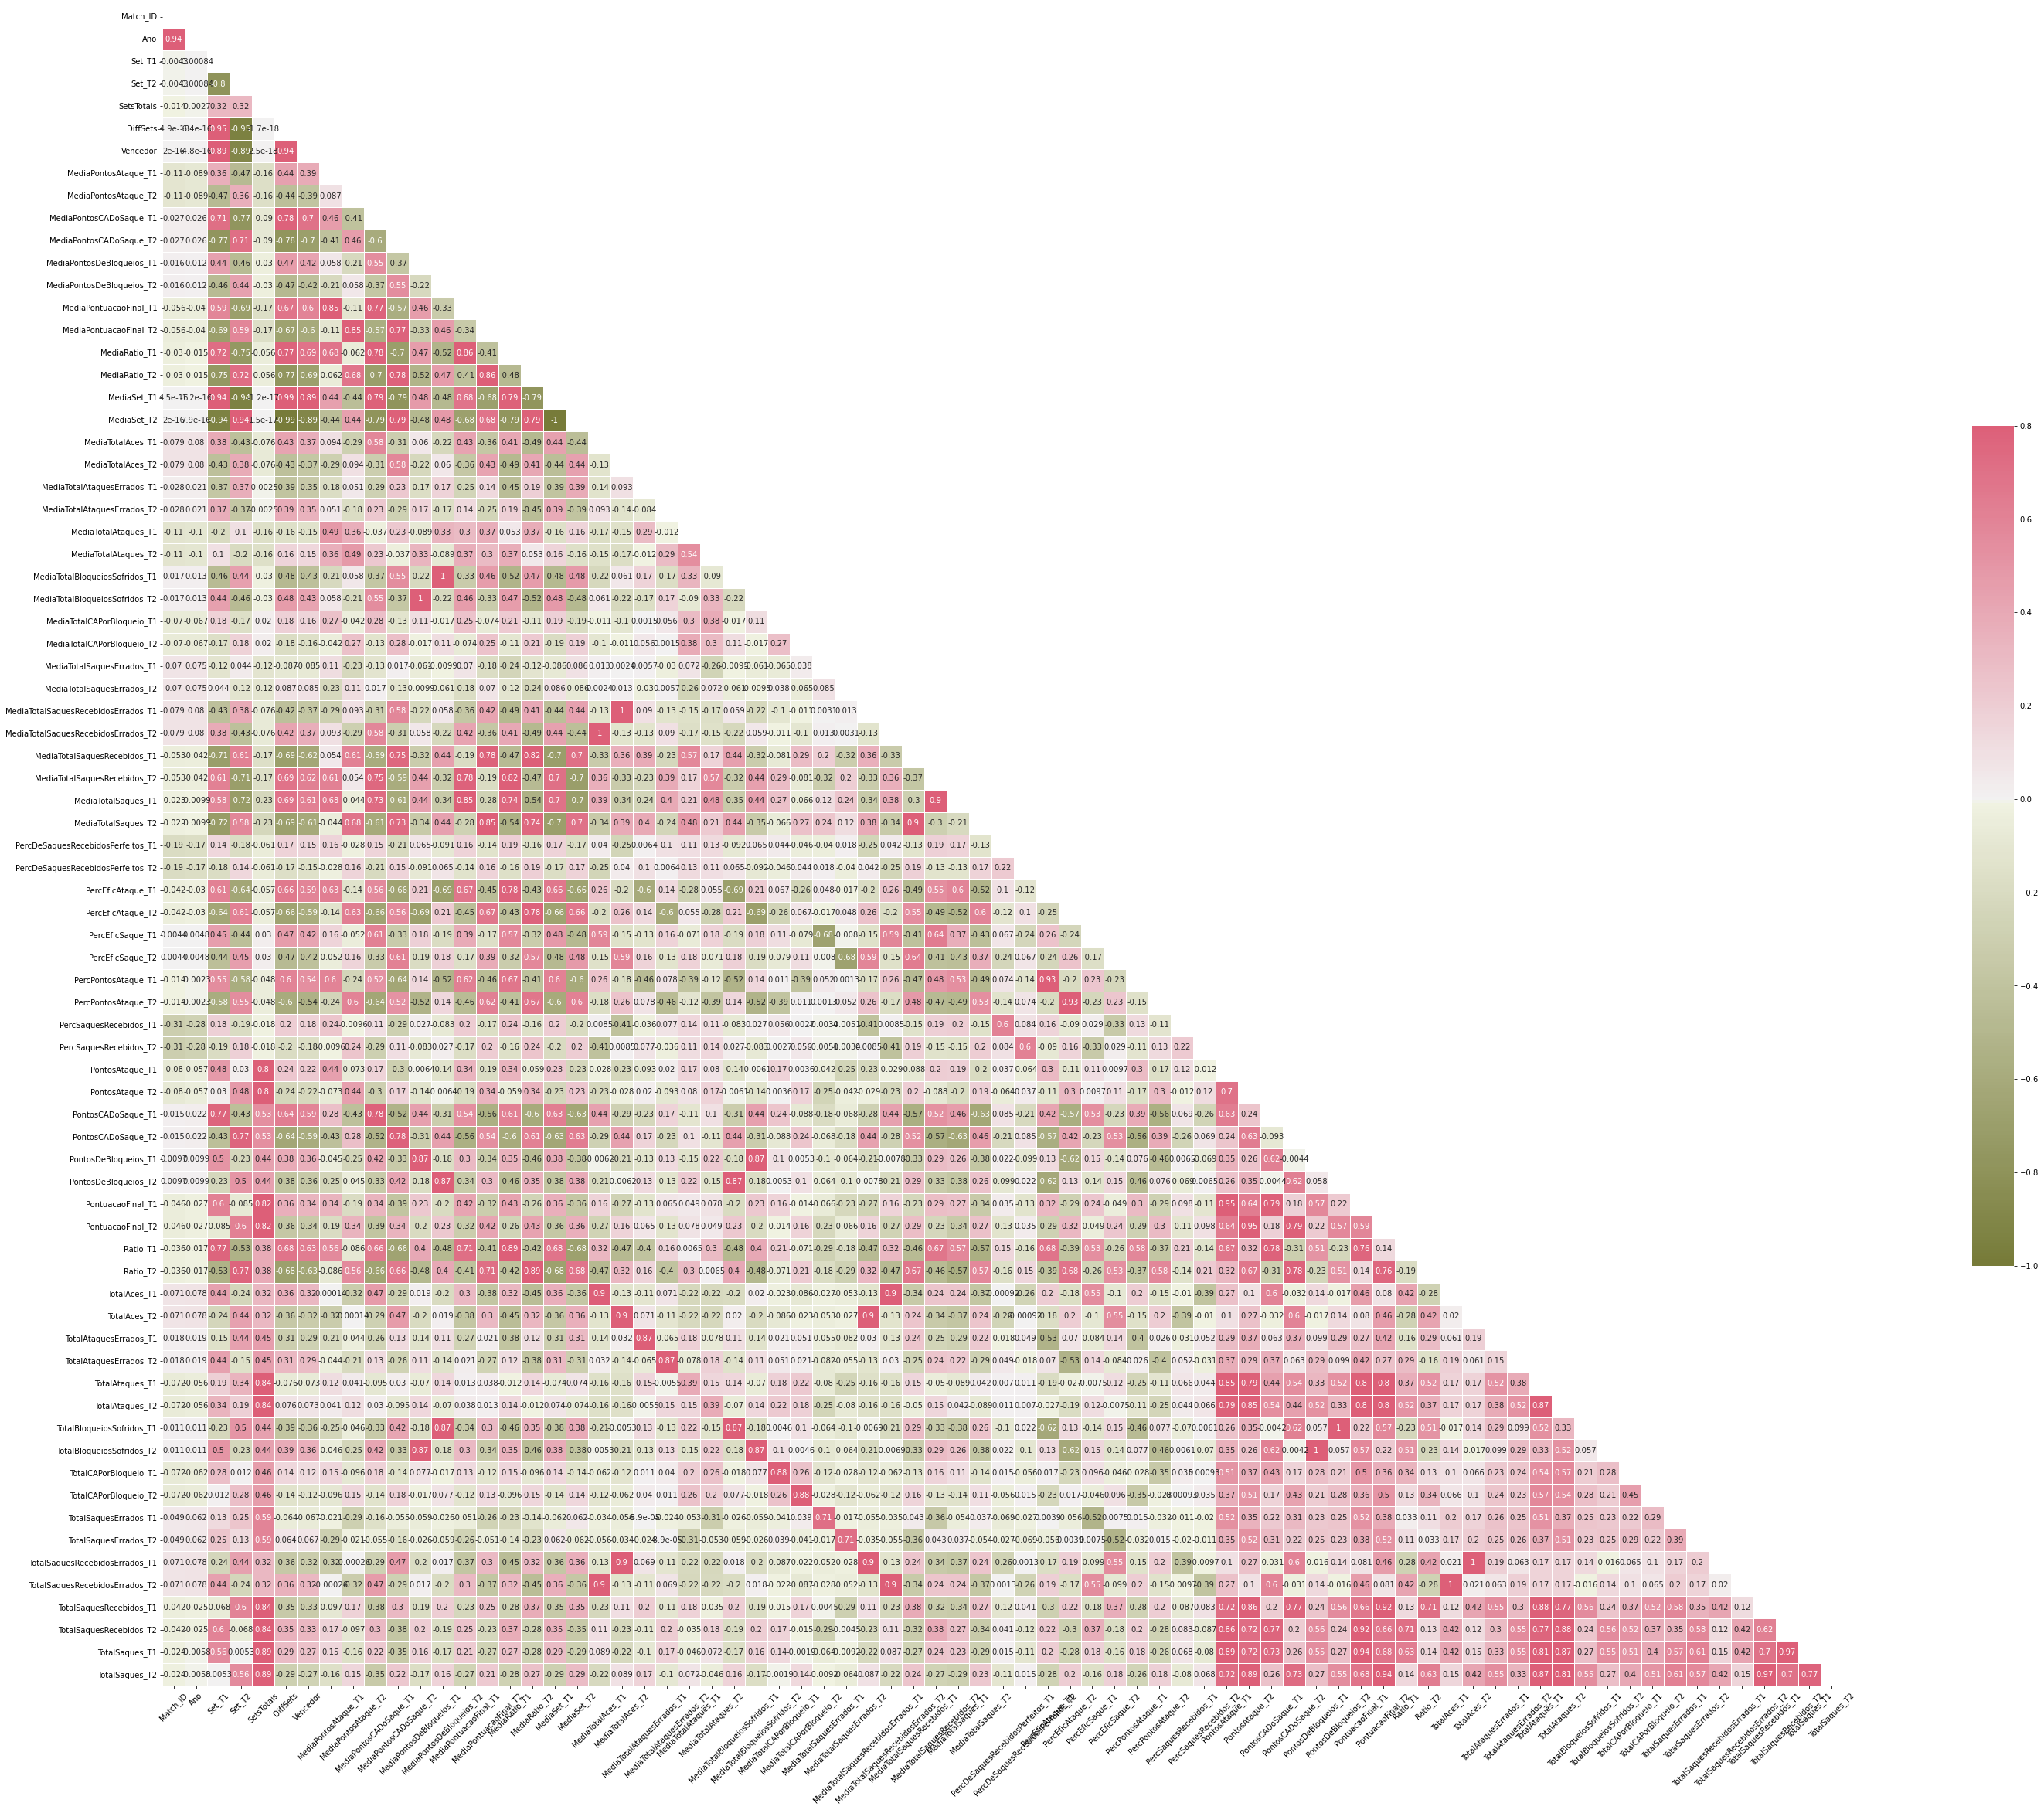

In [25]:
dados_correlacao = df.corr() 
 
mascara = np.zeros_like(dados_correlacao, dtype=float)
mascara[np.triu_indices_from(mascara)] = True
 
f, ax = plt.subplots(figsize=(60, 40))
cmap = sns.diverging_palette(90, 5, as_cmap=True)
sns.heatmap(dados_correlacao, mask=mascara, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
 
plt.show()

In [26]:
dados_correlacao.loc['TotalAtaquesErrados_T2', 'MediaTotalBloqueiosSofridos_T2']

0.11350777494475899

In [27]:
coeficiente_pearson = scipy.stats.pearsonr(df['TotalAtaquesErrados_T2'], df['TotalSaques_T1'])[0]
print(f'Coeficiente de Pearson = {coeficiente_pearson}')

Coeficiente de Pearson = 0.5522008885633647


## CONTAGEM DE VITÓRIAS POR TIME

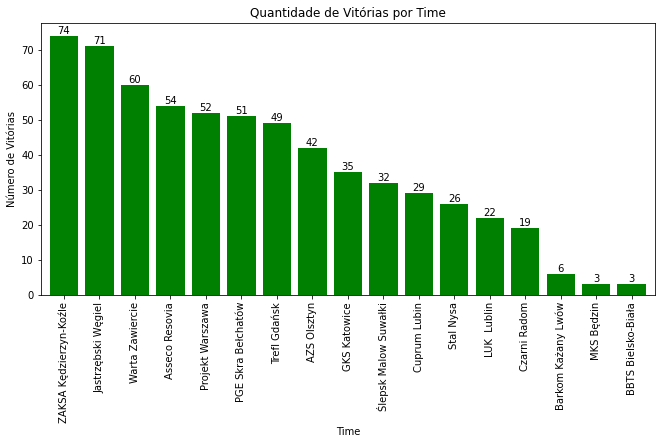

In [31]:
vitorias_por_time = df.groupby('Time')['Vencedor'].sum()
vitorias_por_time = vitorias_por_time.sort_values(ascending=False)

# Criar um gráfico de barras com rótulos de dados e largura ajustada
fig, ax = plt.subplots(figsize=(11, 5))  
vitorias_por_time.plot(kind='bar', color='green', ax=ax, width=0.8)  # Ajustar a largura das barras

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(vitorias_por_time):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Quantidade de Vitórias por Time')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')

plt.show()

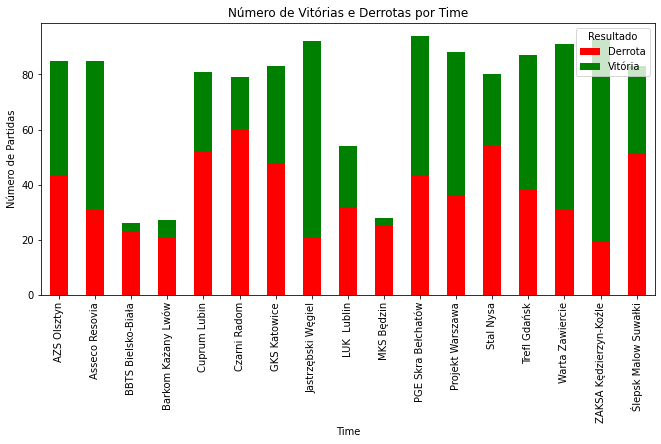

In [32]:
# Criar coluna 'Resultado' com base na coluna 'Vencedor'
df['Resultado'] = np.where(df['Vencedor'] == 1, 'Vitória', 'Derrota')

# Contar o número de vitórias e derrotas por time
contagem_resultados = df.groupby(['Time', 'Resultado']).size().unstack(fill_value=0)

cores = {'Vitória': 'green', 'Derrota': 'red'}
# Criar o gráfico de barras empilhadas
contagem_resultados.plot(
    kind='bar', 
    stacked=True, 
    figsize=(11, 5), 
    color=[cores[col] for col in contagem_resultados.columns]
)

# Configurar o título e os rótulos dos eixos
plt.title('Número de Vitórias e Derrotas por Time')
plt.xlabel('Time')
plt.ylabel('Número de Partidas')

# Adicionar legenda
plt.legend(title='Resultado', loc='upper right')

plt.show()

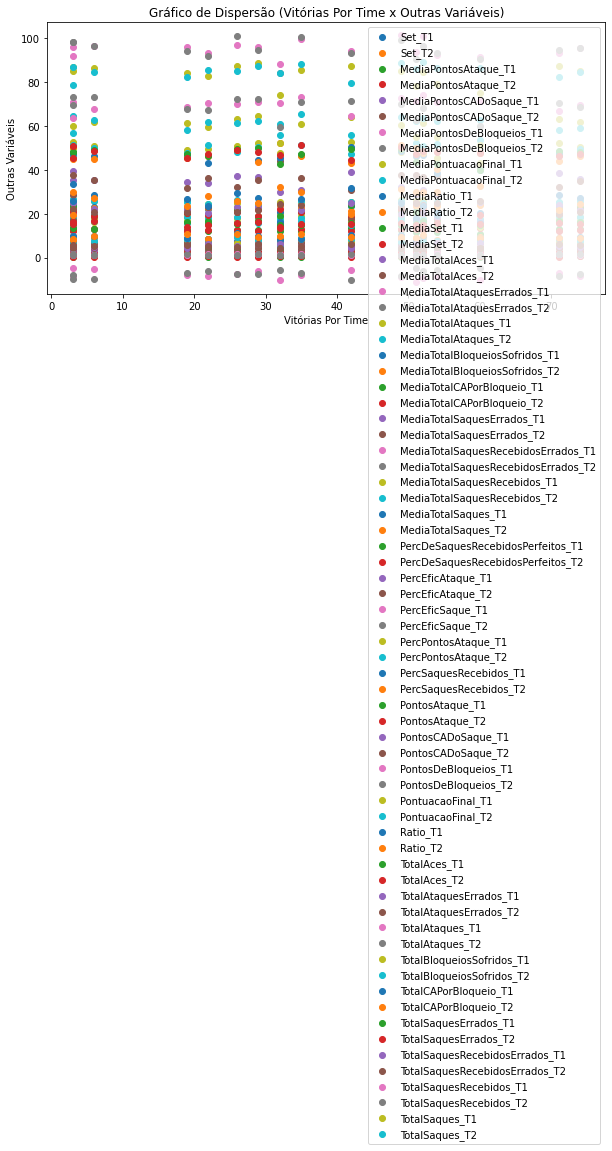

In [39]:
# Cria uma figura e um eixo para o gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Itera sobre as colunas do DataFrame original, exceto a coluna de vitórias
for col in df.filter(regex=(".*T1|.*T2")).columns:
    if col != 'Vencedor':
        # Calcula a média da coluna para cada time utilizando o groupby
        media_por_time = df.groupby('Time')[col].mean()
        
        # Faz o plot dos dados
        ax.scatter(vitorias_por_time, media_por_time, label=col)

# Define o título e os rótulos dos eixos
ax.set_title('Gráfico de Dispersão (Vitórias Por Time x Outras Variáveis)')
ax.set_xlabel('Vitórias Por Time')
ax.set_ylabel('Outras Variáveis')

# Adiciona a legenda
ax.legend()

# Exibe o gráfico
plt.show()

In [ ]:
MediaPontosCADoSaque_T1

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE MÉDIA DE BLOQUEIO E VITÓRIAS POR TIME

In [ ]:
# Calcular o coeficiente de correlação
# coeficiente_pearson = scipy.stats.pearsonr(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson}')

```Uma correlação de 0.36 indica uma correlação positiva moderada entre as variáveis Media_Bloqueio e Contagem_Vitorias. Isso significa que, em média, à medida que a Media_Bloqueio aumenta, a Contagem_Vitorias também tende a aumentar, mas não de forma perfeita. A magnitude da correlação (0.36) sugere que a relação não é extremamente forte, mas ainda assim existe uma tendência positiva.```

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE EFICIENCIA DO SAQUE E VITÓRIAS POR TIME

In [ ]:
# Criar um gráfico de dispersão
# plt.figure(figsize=(16, 7))
# plt.scatter(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'], color='green')

# # Adicionar rótulos aos pontos
# for i, nome_time in enumerate(df_relacao_saque.index):
#     plt.annotate(nome_time, (df_relacao_saque['Media_Saque'][i], df_relacao_saque['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Configurar o título e os rótulos do eixo
# plt.title('Relação entre Média de Eficiência de Saques e Número de Vitórias')
# plt.xlabel('Média de Eficiência de Saques')
# plt.ylabel('Número de Vitórias')

# # Exibir o gráfico
# plt.show()


In [ ]:
# # Calcular o coeficiente de correlação
# coeficiente_pearson_saque = scipy.stats.pearsonr(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson_saque}')

```Ocoeficiente de correlação de Pearson é 0,8735802344182835. Esse valor é próximo de 1, o que indica uma correlação linear positiva forte entre as duas variáveis. Em outras palavras, as duas variáveis aumentam ou diminuem juntas.```